In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager
import cvxpy as cvx

In [4]:
fname = os.listdir('results')
problem = 'lava_problem'
npz_name = []
for i in fname:
    # if i[-5] == 'f':
    if 'Kullback' in i:
        npz_name.append(i)
    elif 'Total' in i:
        npz_name.append(i)
    elif 'Neyman' in i:
        npz_name.append(i)

# Load x-axis and POMDP data
opt_data = np.load("results/"+problem + "_optimal_results.npz")
p_correct_vals = opt_data['p_correct_vals']
opt_values = opt_data['opt_values']

data_all = [opt_values]

for j in npz_name:
    data = np.load("results/"+j)
    bounds = data['bounds']
    data_all.append(data['bounds'])

([<matplotlib.axis.YTick at 0x7faa8593e110>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

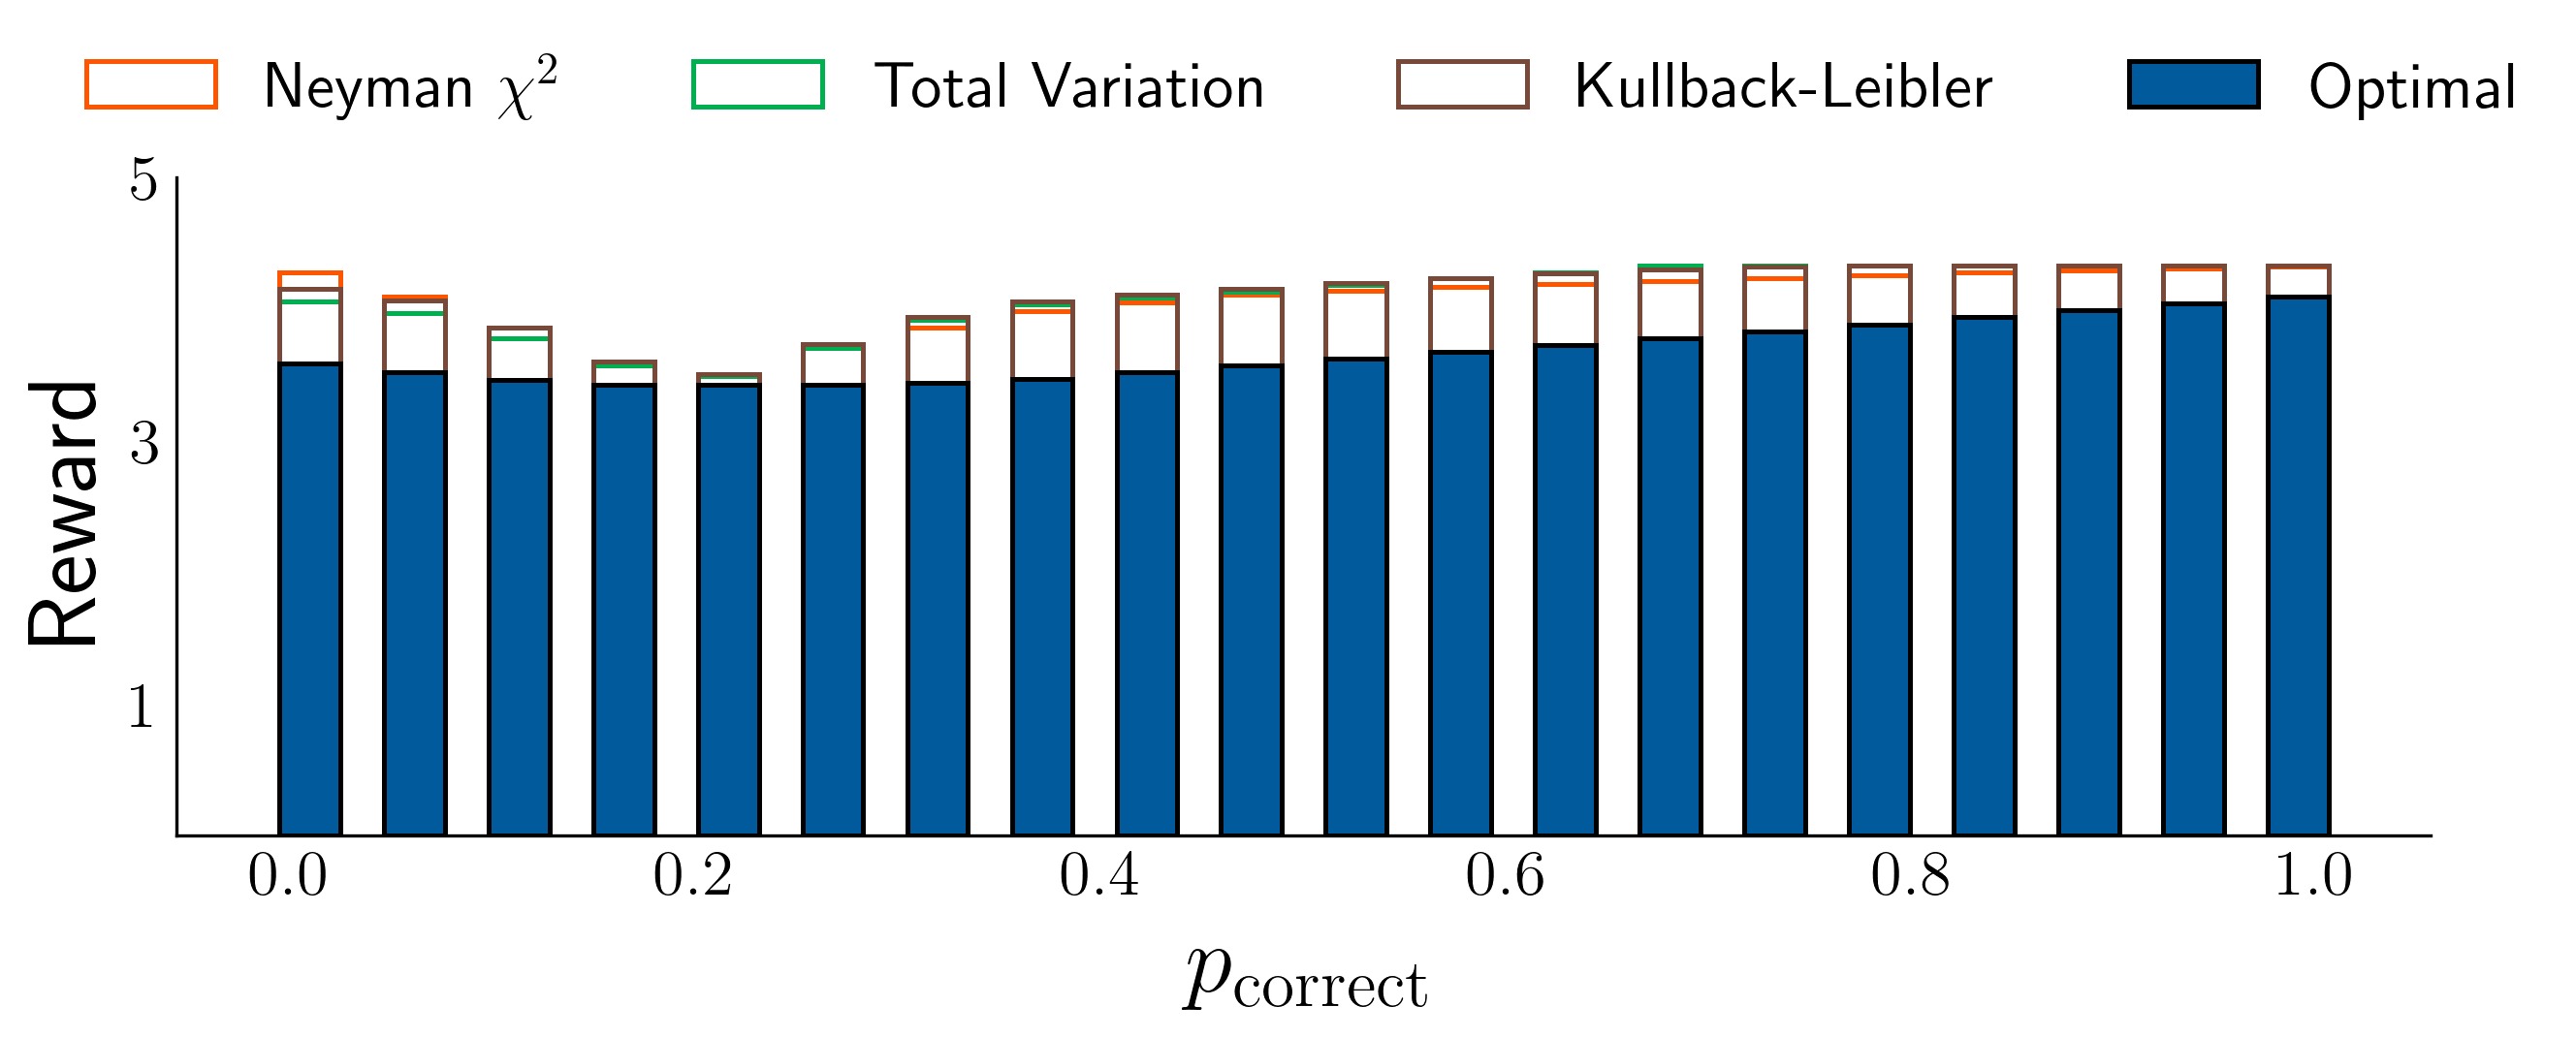

In [5]:
# Plot
# fig, ax = plt.subplots()
# ax.plot(p_correct_vals, opt_values, '*--', label='POMDP', linewidth=0.5)

plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = '16'

fig, ax = plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)


rows = ('POMDP', 'Neyman', 'TV', 'KL')
colors = ['#005a9c','none','none','none']

n_rows = len(data_all)
bar_width = 0.03

ax.bar(p_correct_vals, data_all[3], bar_width, edgecolor = "#fe5500", linewidth = 1.2, color=colors[3],label = r'Neyman $\chi^2$')
ax.bar(p_correct_vals, data_all[2], bar_width, edgecolor = 	"#00b050", linewidth = 1.2, color=colors[2],label = 'Total Variation')
ax.bar(p_correct_vals, data_all[1], bar_width, edgecolor = "#784939", linewidth = 1.2, color=colors[1],label = 'Kullback-Leibler')
ax.bar(p_correct_vals, data_all[0], bar_width, edgecolor = 'k', linewidth = 1.2, color=colors[0],label = 'Optimal')



ax.legend(bbox_to_anchor=(0.5,1), loc = 'lower center', edgecolor = 'white', ncol = 4)


plt.xlabel("$p_{\mathrm{correct}}$",fontsize = 24)
plt.ylabel('Reward',fontname = 'Dejavu Sans', fontsize = 24)
plt.yticks([1,3,5])


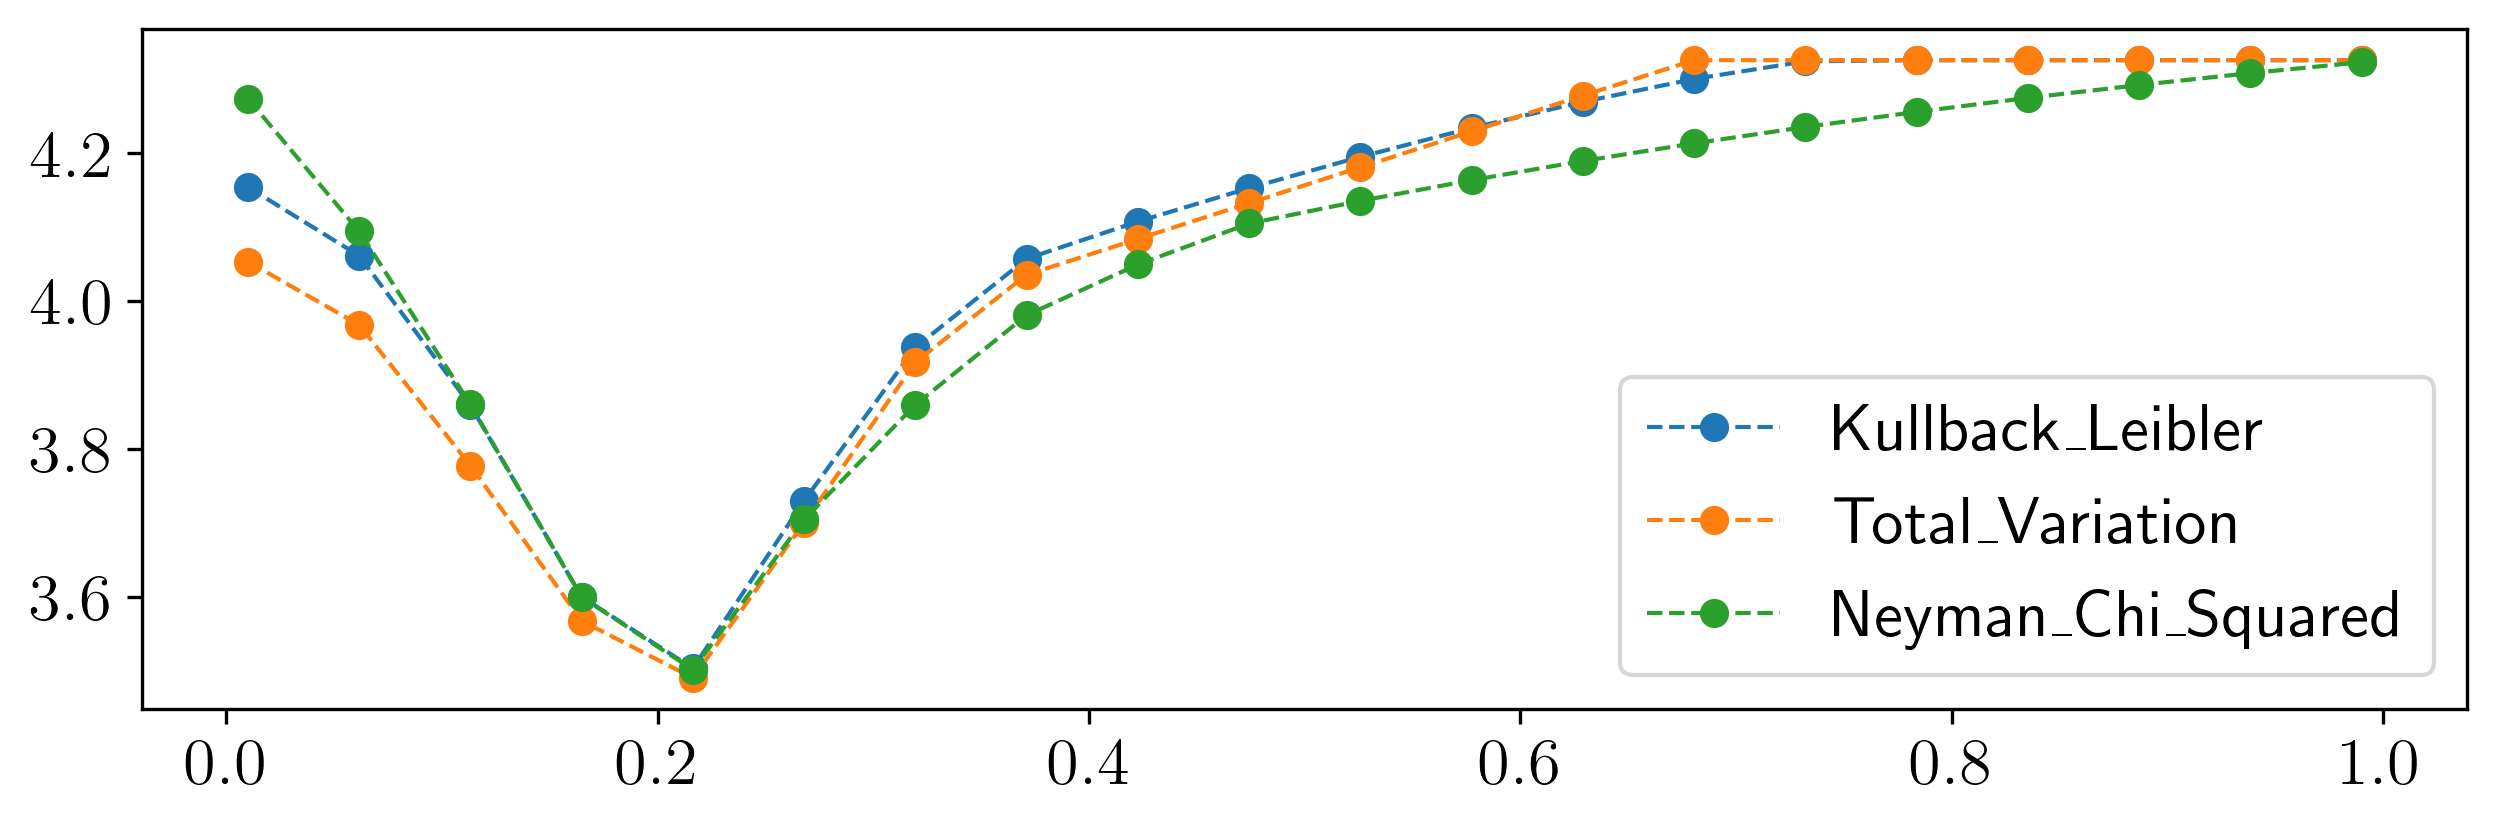

In [6]:
fig, ax = plt.subplots()
for j in npz_name:
		data = np.load("results/"+j)
		bounds = data['bounds']
		ax.plot(p_correct_vals, bounds, 'o--', label=j[13:-14], linewidth=1) # function name part -- dependent on file naming
ax.legend()

([<matplotlib.axis.YTick at 0x7faa848bb650>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

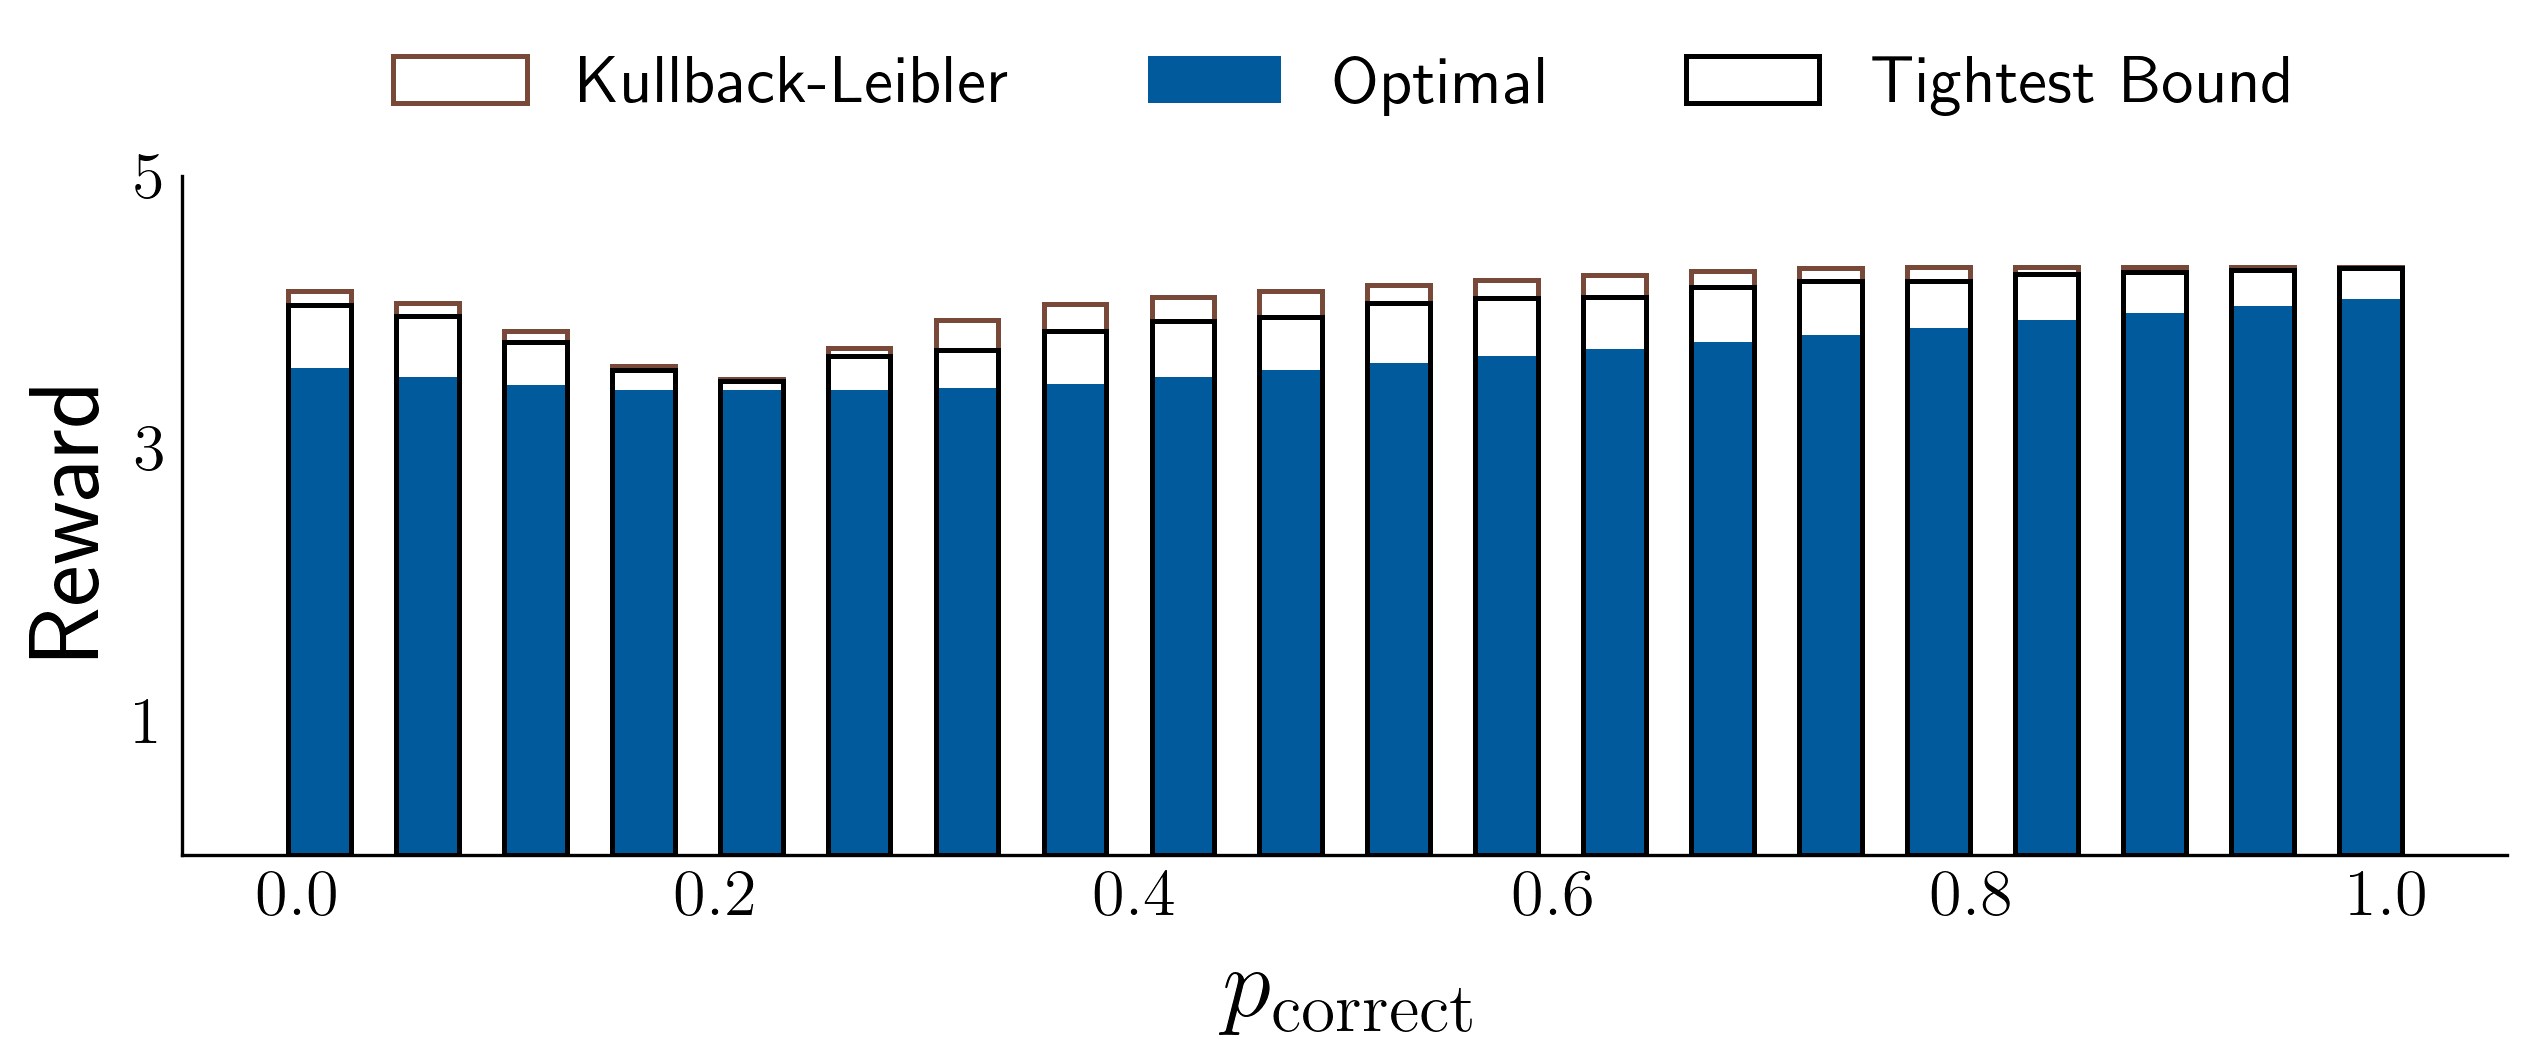

In [7]:
data = np.load("results/results5_0921.npz")
bounds = data['bound_results']
bounds[16:20] = data_all[3][16:20]

fig, ax = plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)


rows = ('POMDP','PL')
colors = ['#005a9c','none']

bar_width = 0.03

ax.bar(p_correct_vals, data_all[1], bar_width, edgecolor = "#784939", linewidth = 1.2, color=colors[1],label = 'Kullback-Leibler')
ax.bar(p_correct_vals, data_all[0], bar_width, edgecolor = 'none', color=colors[0],label = 'Optimal')
ax.bar(p_correct_vals, bounds, bar_width, edgecolor = 'k', linewidth = 1.2, color=colors[1],label = 'Tightest Bound')



ax.legend(bbox_to_anchor=(0.5,1), loc = 'lower center', edgecolor = 'white', ncol = 3)


plt.xlabel("$p_{\mathrm{correct}}$",fontsize = 24)
plt.ylabel('Reward',fontname = 'Dejavu Sans', fontsize = 24)
plt.yticks([1,3,5])


In [8]:
np.where(bounds > data_all[3])

(array([], dtype=int64),)

In [11]:
def l(x,n,svec):
    # x is the independent variable
    # n is the number of slices
    # svec is the slope vector with dimension (n,1), starting from 1 to 0 backwards
    intercept = [-s/n for s in svec]
    output = [0]*(2*n)
    for i in range(n):
        output[i] = svec[i]*(x-(i+1)/n)+sum(intercept[(i+1):n])
    for i in range(n,2*n):
        output[i] = svec[i]*(x-i/n)-sum(intercept[n:i])
    return cvx.max(cvx.vstack(output),axis=0)

Text(0, 0.5, '$f(x)$')

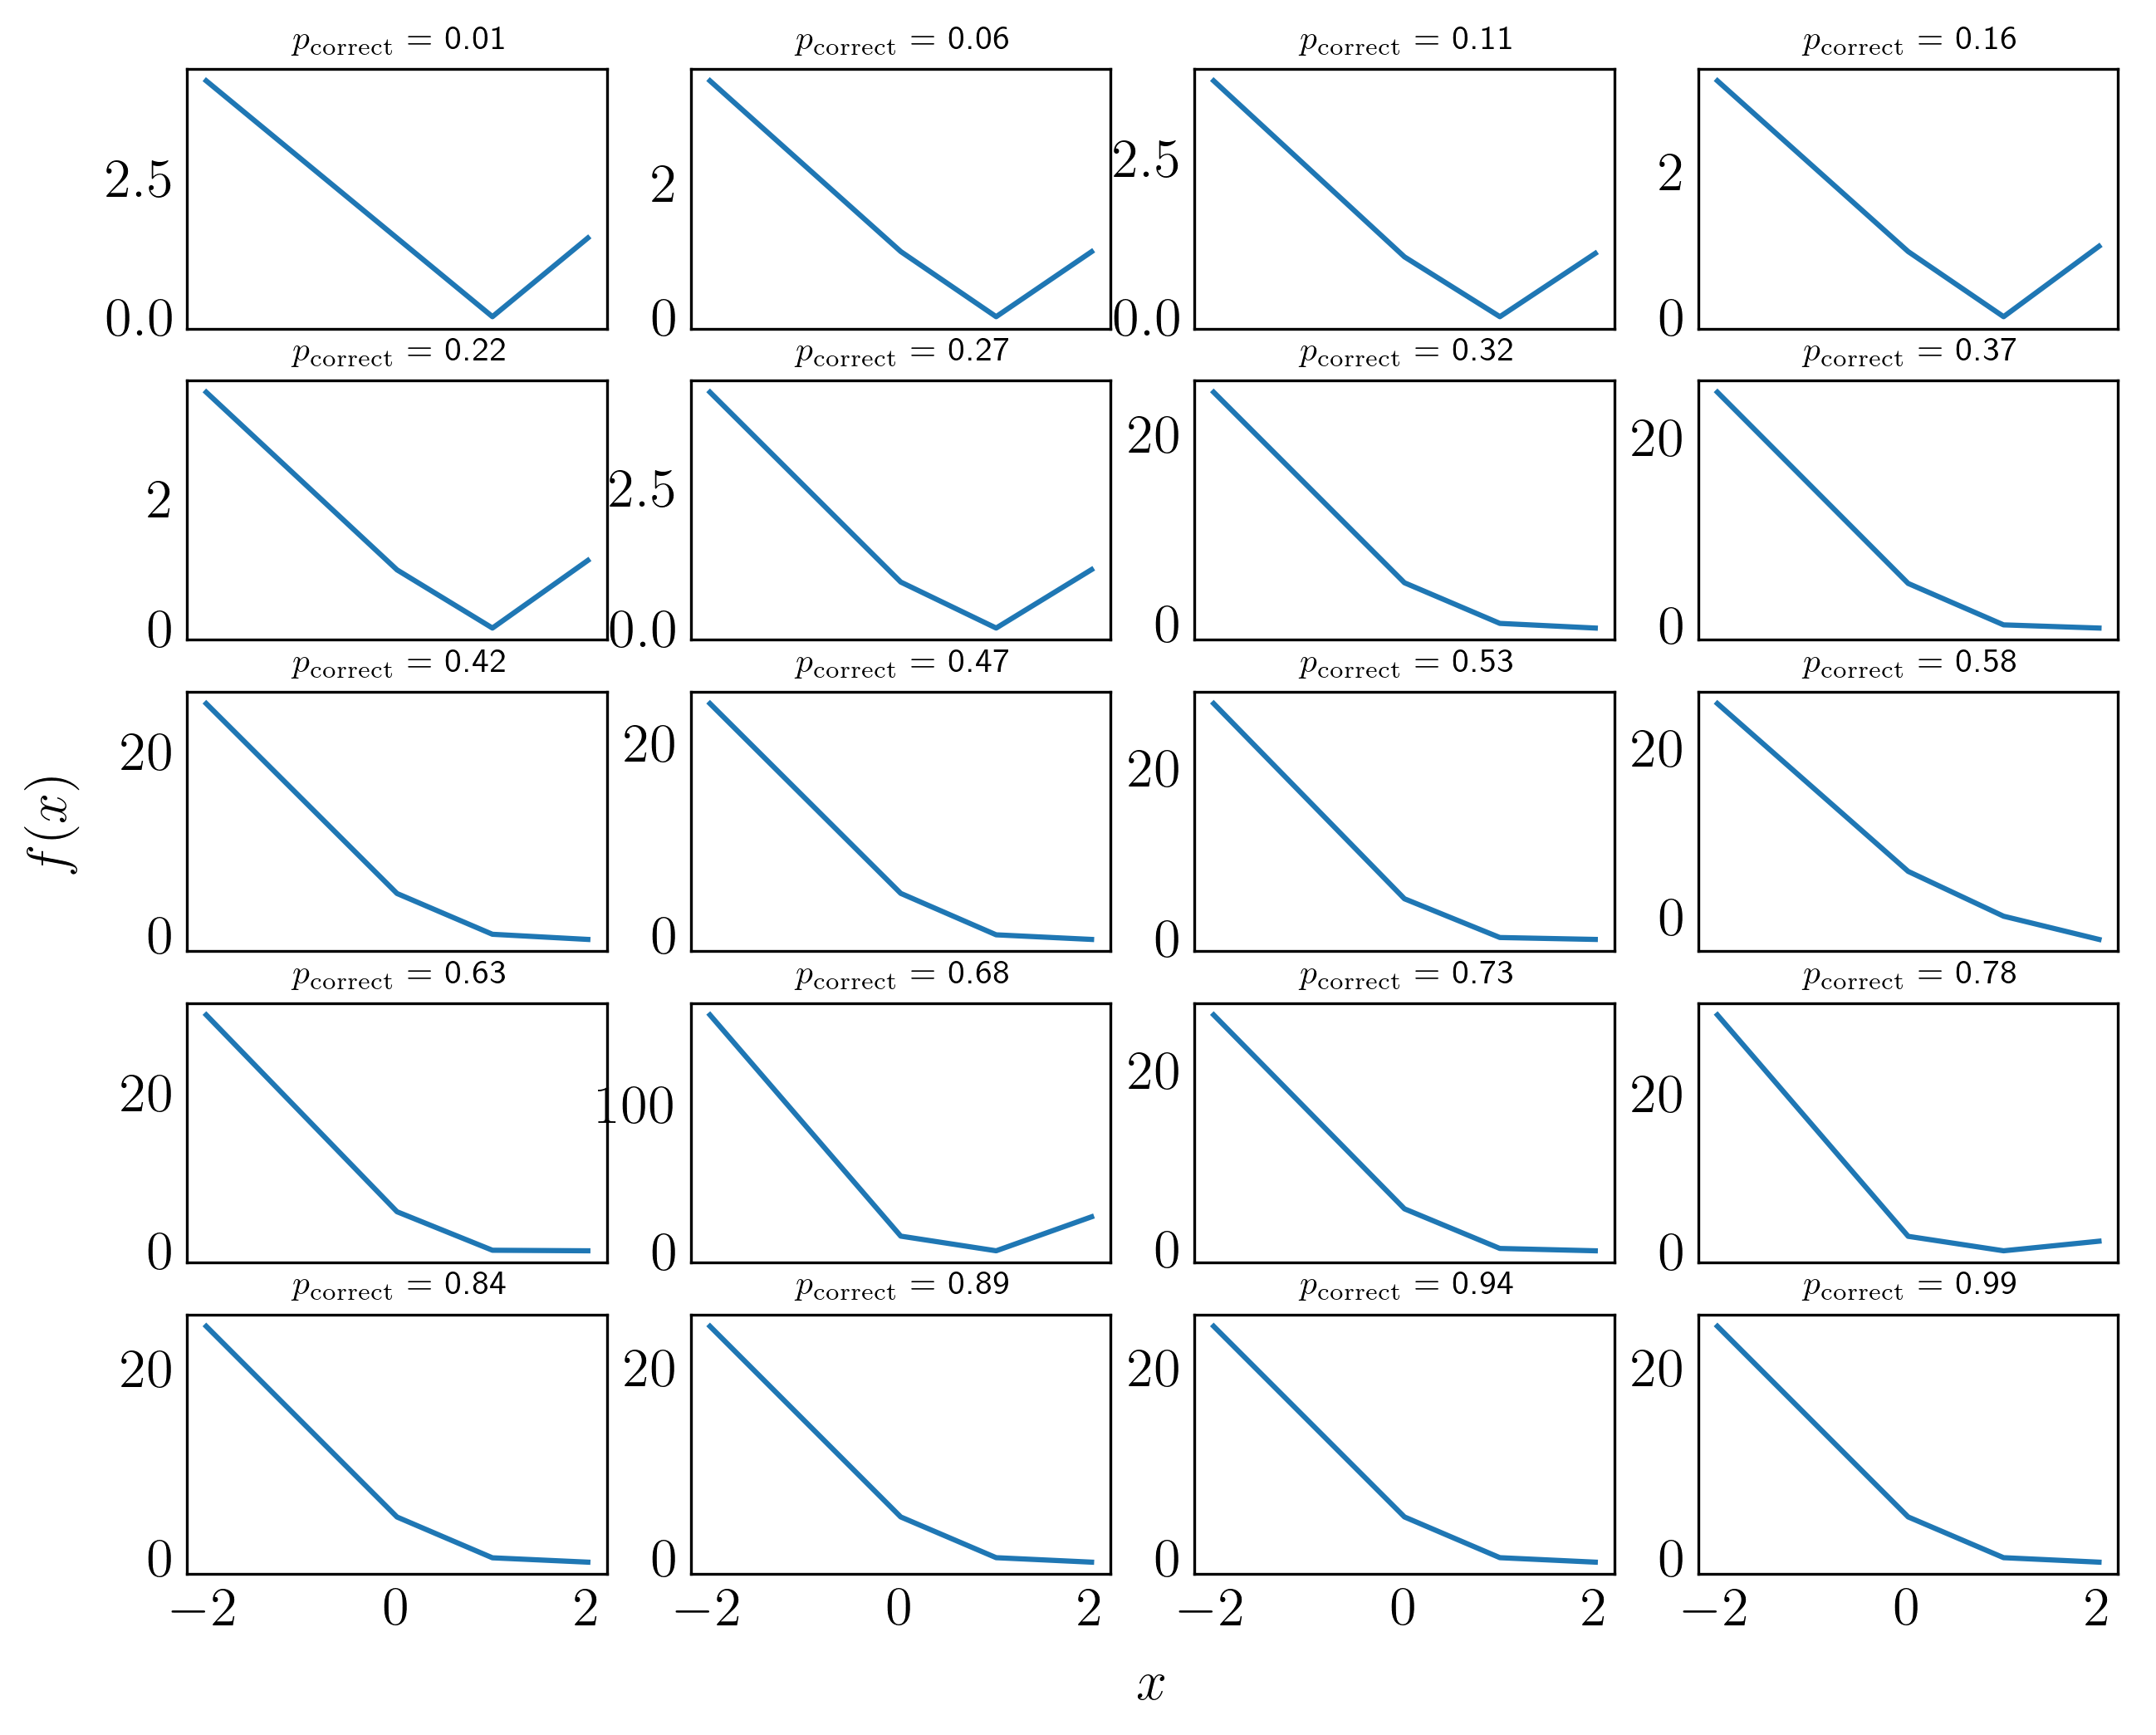

In [29]:
plt.rcParams["figure.figsize"] = (10,6)

slopes = data['slopes']
bounds = data['bound_results']
n = int(np.shape(slopes)[1]/2)


xt = np.array([-2,-1,0,1,2])
    
fig, ax = plt.subplots(5,4,sharex=True,sharey=False)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xticks([-1, 0, 1, 2])

for i in range(5):
    for j in range(4):
        svec = slopes[i*4+j]
        yt = [l(x,n,svec).value for x in xt]
        ax[i,j].plot(xt,yt)
        p = i*4+j
        ax[i,j].set_title("$p_{\mathrm{correct}}$"+' = '+str(round(p_correct_vals[p],2)),fontsize = 10)
        # ax[i,j].spines[['right', 'top']].set_visible(False)
        ax[i,j].tick_params(axis=u'both', which=u'both',length=0)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')